In [64]:
import tensorflow
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers.core import Dense, Dropout, Flatten
from keras.layers.convolutional import Conv2D,MaxPooling2D
from keras.optimizers import RMSprop

In [68]:
(mnist_train_images,mnist_train_labels),(mnist_test_images,mnist_test_labels)=mnist.load_data()

In [69]:
# from tensorflow.keras import backend as K

# if K.image_data_format() == 'channels_first':
#     train_images = mnist_train_images.reshape(mnist_train_images.shape[0], 1, 28, 28)
#     test_images = mnist_test_images.reshape(mnist_test_images.shape[0], 1, 28, 28)
#     input_shape = (1, 28, 28)
# else:
train_images = mnist_train_images.reshape(mnist_train_images.shape[0], 28, 28, 1)
test_images = mnist_test_images.reshape(mnist_test_images.shape[0], 28, 28, 1)
input_shape = (28, 28, 1)
    
train_images= train_images.astype('float32')
test_images = test_images.astype('float32')
train_images/= 255
test_images /= 255

In [70]:
#converting to one hot encoded format
train_labels = tensorflow.keras.utils.to_categorical(mnist_train_labels, 10)
test_labels = tensorflow.keras.utils.to_categorical(mnist_test_labels, 10)

[1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


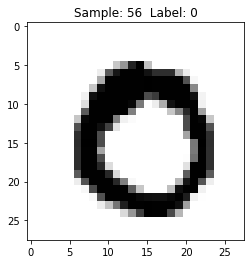

In [71]:
import matplotlib.pyplot as plt

def display_sample(num):
    #Print the one-hot array of this sample's label 
    print(train_labels[num])  
    #Print the label converted back to a number
    label = train_labels[num].argmax(axis=0)
    #Reshape the 768 values to a 28x28 image
    image = train_images[num].reshape([28,28])
    plt.title('Sample: %d  Label: %d' % (num, label))
    plt.imshow(image, cmap=plt.get_cmap('gray_r'))
    plt.show()
    
display_sample(56)

In [82]:
model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3),
                 activation='relu',
                 input_shape=input_shape))
# 64 3x3 kernels
model.add(Conv2D(64, (3, 3), activation='relu'))
# Reduce by taking the max of each 2x2 block
model.add(MaxPooling2D(pool_size=(2, 2)))
# Dropout to avoid overfitting
model.add(Dropout(0.25))
# Flatten the results to one dimension for passing into our final layer
model.add(Flatten())
# A hidden layer to learn with
model.add(Dense(128, activation='relu'))
# Another dropout
model.add(Dropout(0.5))
# Final categorization from 0-9 with softmax
model.add(Dense(10, activation='softmax'))

In [83]:
model.summary()

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_9 (Conv2D)            (None, 26, 26, 32)        320       
_________________________________________________________________
conv2d_10 (Conv2D)           (None, 24, 24, 64)        18496     
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 12, 12, 64)        0         
_________________________________________________________________
dropout_9 (Dropout)          (None, 12, 12, 64)        0         
_________________________________________________________________
flatten_5 (Flatten)          (None, 9216)              0         
_________________________________________________________________
dense_9 (Dense)              (None, 128)               1179776   
_________________________________________________________________
dropout_10 (Dropout)         (None, 128)              

In [84]:
model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

In [85]:
with tensorflow.device('/device:GPU:0'):
  model.fit(train_images, train_labels,
                    batch_size=128,
                    epochs=10,
                    verbose=2,
                    validation_data=(test_images, test_labels))

Train on 60000 samples, validate on 10000 samples
Epoch 1/10
 - 5s - loss: 0.2296 - accuracy: 0.9299 - val_loss: 0.0503 - val_accuracy: 0.9834
Epoch 2/10
 - 4s - loss: 0.0826 - accuracy: 0.9759 - val_loss: 0.0388 - val_accuracy: 0.9877
Epoch 3/10
 - 4s - loss: 0.0590 - accuracy: 0.9826 - val_loss: 0.0341 - val_accuracy: 0.9897
Epoch 4/10
 - 4s - loss: 0.0506 - accuracy: 0.9842 - val_loss: 0.0297 - val_accuracy: 0.9895
Epoch 5/10
 - 4s - loss: 0.0413 - accuracy: 0.9870 - val_loss: 0.0336 - val_accuracy: 0.9903
Epoch 6/10
 - 4s - loss: 0.0376 - accuracy: 0.9880 - val_loss: 0.0300 - val_accuracy: 0.9905
Epoch 7/10
 - 4s - loss: 0.0319 - accuracy: 0.9899 - val_loss: 0.0293 - val_accuracy: 0.9908
Epoch 8/10
 - 4s - loss: 0.0289 - accuracy: 0.9911 - val_loss: 0.0287 - val_accuracy: 0.9919
Epoch 9/10
 - 4s - loss: 0.0264 - accuracy: 0.9914 - val_loss: 0.0284 - val_accuracy: 0.9922
Epoch 10/10
 - 4s - loss: 0.0240 - accuracy: 0.9921 - val_loss: 0.0320 - val_accuracy: 0.9914


In [88]:
model.save("Mymodel.h5")

In [8]:
model=tensorflow.keras.models.load_model("Mymodel.h5")

In [86]:
score = model.evaluate(test_images, test_labels, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 0.031958312514554395
Test accuracy: 0.9914000034332275


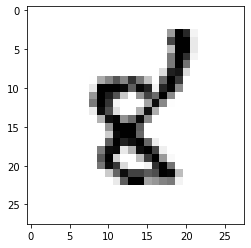

In [92]:
# def array_to_image(num):
#     #Print the one-hot array of this sample's label 
#     print(train_labels[num])  
#     #Print the label converted back to a number
#     label = train_labels[num].argmax(axis=0)
#     print(label)
#     #Reshape the 768 values to a 28x28 image
image = train_images[9601].reshape([28,28])
plt.imshow(image, cmap=plt.get_cmap('gray_r'))
plt.show()


In [95]:
import cv2
from google.colab.patches import cv2_imshow
from PIL import Image
import numpy as np


# test_file="9.jpg"
# col=Image.open(test_file)
# gray=col.convert('L')
# bw=gray.point(lambda x:0 if x<100 else 255,'1')
# bw.save("bw_image.jpg")
# bw
# image=cv2.imread("bw_image.jpg",cv2.IMREAD_GRAYSCALE)
# image=cv2.bitwise_not(image)
# plt.imshow(image,cmap=plt.cm.binary)
# plt.show()
# image_new=cv2.resize(image,(28,28))
# plt.imshow(image_new,cmap=plt.cm.binary)
# plt.show()


# if K.image_data_format() == 'channels_first':
#     image = image.reshape(-1,1, 28, 28)
#     input_shape = (1, 28, 28)
# else:
image=train_images[9601]
# image = image.astype('float32')
image = image.reshape(-1,28, 28,1)
# image/=255
# print(image.shape)
# image=cv2.imread("2.jpg")
# # image=cv2.cvtColor(image,cv2.COLOR_BGR2GRAY)
# plt.imshow(image,cmap=plt.cm.binary)
# image = cv2.resize(image,(28, 28), interpolation=cv2.INTER_AREA)


# image = image_new.reshape(-1,28, 28, 1)
# image = np.array(image, dtype='float32')
# image /= 255


print(image.shape)
# plt.imshow(image,cmap=plt.cm.binary)

(1, 28, 28, 1)


In [96]:
import numpy as np

pred_array = model.predict(image)
print(pred_array)
pred_array = np.argmax(pred_array)
print('Result: {0}'.format(pred_array))

[[2.5946472e-11 3.8013837e-10 4.4555183e-08 5.1553872e-08 2.2298817e-10
  7.4692643e-08 2.4434892e-06 4.2004288e-13 9.9999738e-01 5.8126903e-11]]
Result: 8
